<a href="https://colab.research.google.com/github/bernia/MachineLearning/blob/master/myFirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

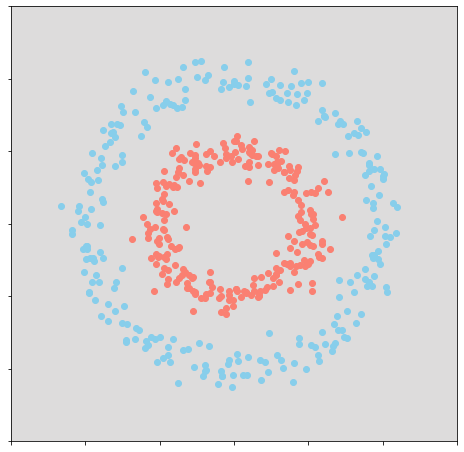

In [7]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#My first NN, credits to dotCSV

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.07)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)


### Tensorflow

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Step 0 / 1000 - Loss =  0.4277257 - Acc = 0.486
Step 25 / 1000 - Loss =  0.3560148 - Acc = 0.548
Step 50 / 1000 - Loss =  0.31675404 - Acc = 0.568
Step 75 / 1000 - Loss =  0.21552618 - Acc = 0.684
Step 100 / 1000 - Loss =  0.0918842 - Acc = 0.896
Step 125 / 1000 - Loss =  0.06792873 - Acc = 0.926
Step 150 / 1000 - Loss =  0.053045593 - Acc = 0.942
Step 175 / 1000 - Loss =  0.04326694 - Acc = 0.956
Step 200 / 1000 - Loss =  0.03667253 - Acc = 0.966
Step 225 / 1000 - Loss =  0.031566728 - Acc = 0.972
Step 250 / 1000 - Loss =  0.027667152 - Acc = 0.982
Step 275 / 1000 - Loss =  0.024696775 - Acc = 0.988
Step 300 / 1000 - Loss =  0.022399522 - Acc = 0.988
Step 325 / 1000 - Loss =  0.020502314 - Acc = 0.99
Step 350 / 1000 - Loss =  0.018928882 - Acc = 0.992
Step 375 / 1000 - Loss =  0.017620005 - Acc = 0.996
Step 400 / 1000 - Loss =  0.016467962 - Acc = 1.0
Step 425 / 1000 - Loss =  0.01545873 - Ac

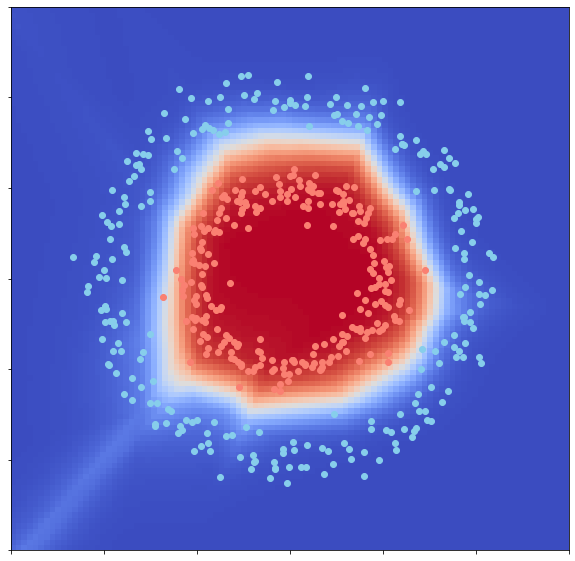

In [11]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 20, 12, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y - SALIDA.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de la salida
loss = tf.losses.mean_squared_error(pY,iY)

# Optimizador de la red
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 #Ciclos de entrenamiento

iPY = [] #Evolucion de las predicciones, para hacer una animacion

with tf.Session() as sess:
    # Inicializamos todos los parámetros de la red, las matrices W y b.
    sess.run(tf.global_variables_initializer())
    # Iteramos n pases de entrenamiento.
    for step in range(n_steps):
    
      # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
      # La evaluación del optimizer producirá el entrenamiento de la red.
      _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
      
      # Cada 25 iteraciones, imprimimos métricas.
      if step % 25 == 0: 
        
        # Cálculo del accuracy.
        acc = np.mean(np.round(_pY) == Y)
        
        # Impresión de métricas.
        print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
        
        # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
        _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

        # Y lo guardamos para visualizar la animación.
        iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

### Keras

In [0]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

lr = 0.05           # learning rate
nn = [2, 20, 12, 1]  # numero de neuronas por capa

# Objeto que contendrá nuestra red neruonal, como secuencia de capas
model = kr.Sequential()

# Añadimos las capas
l1 = model.add(kr.layers.Dense(nn[1],activation='relu'))
l2 = model.add(kr.layers.Dense(nn[2],activation='relu'))
l3 = model.add(kr.layers.Dense(nn[3],activation='sigmoid'))

# Compilamos el modelo, definiendo la funcion de coste y el optimizador
model.compile(loss='mse',optimizer=kr.optimizers.SGD(lr=0.05),metrics=['acc'])

# Entrenamos al modelo
model.fit(X,Y, epochs=100)
